# **Sentiment Analysis: Social Media Analysis on Coffee Brand Engagement**
EMIMM0139 Social Media and Web Analytics

Chananchida Siriouychai 2641729

# Data Preprocessing

In [1]:
!pip install nltk
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

# Load the Excel file into a DataFrame
df = pd.read_excel("pretrained_model.xlsx")
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Reviewer Name,Review Title,Review Body,Review Date,Sentiment
0,Betty T.,Delicious!,Delicious!,20 hours ago,Positive
1,Celena M.,Caramel Heaven!,This has helped me stop buying coffee out ever...,Yesterday,Positive
2,Michael B.,My Favorite,Caramel has always had a special place in my h...,Yesterday,Positive
3,Michael B.,Its Top,Top notch flavor and I’m always excited to see...,Yesterday,Positive
4,Dekotah P.,Caramel Coffee,It arrived quick and tastes sooooo good. I lov...,Yesterday,Positive
...,...,...,...,...,...
6539,Matt M.,Amazing,1st concentrate that I've tried and love it.,1 year ago,Positive
6540,Kristi H.,Decaf,This works well when I need a coffee fix later...,2 months ago,Positive
6541,Judy G.,Morning Coffee Got Better Anytime Coffee,I've read a lot of complaints on here and I ha...,3 years ago,Positive
6542,Gail F.,Fun Coffee!,I bought a jar of javy to see how it was. I li...,3 years ago,Positive


In [4]:
# Initialize the stemmer and stopword list
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

#add custom stopwords specific to your domain
custom_stopwords = ["this", "that", "it", "I", "the", "a", "an", "and", "but",
                    "or", "with", "for", "of", "to", "in", "on", "use", "used",
                    "try", "tried", "drink", "serve", "prepare", "pour",
                    "add", "stir", "create", "test", "flavor" "yesterday", "today",
                    "now", "ago", "time", "hours"]
stop_words = stop_words.union(custom_stopwords)

In [5]:
def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove punctuation and numbers (keep only alphabets and whitespace)
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenize the text into words
    tokens = word_tokenize(text)

    # 4. Remove stopwords and optionally perform stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    # 5. Join tokens back into a string (if needed)
    processed_text = ' '.join(tokens)
    return processed_text

# Define the column to apply preprocessing to
text_column = 'Review Body'

# Apply the preprocessing function to the text column
df['processed_review'] = df[text_column].astype(str).apply(preprocess_text)

# Preview the DataFrame to check results
df[[text_column, 'processed_review']]

,Review Body,processed_review
0,Delicious!,delici
1,This has helped me stop buying coffee out ever...,help stop buy coffe everyday work delici mani ...
2,Caramel has always had a special place in my h...,caramel alway special place heart flavor go al...
3,Top notch flavor and I’m always excited to see...,top notch flavor im alway excit see creativ wa...
4,It arrived quick and tastes sooooo good. I lov...,arriv quick tast sooooo good love
...,...,...
6539,1st concentrate that I've tried and love it.,st concentr ive love
6540,This works well when I need a coffee fix later...,work well need coffe fix later day dont need c...
6541,I've read a lot of complaints on here and I ha...,ive read lot complaint say bogu coffe absolut ...
6542,I bought a jar of javy to see how it was. I li...,bought jar javi see like fact easi fast good


# Sythetic Minority Over-sampling (SMOTE) Technique to manage class imbalance of the dataset for more accurate model.

In [6]:
#SMOTE
# Encode sentiment labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Review Body'])

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled labels back to original text labels
y_res_text = label_encoder.inverse_transform(y_resampled)

# Show balanced class distribution
balanced_counts = pd.Series(y_res_text).value_counts()
print("Balanced Sentiment Distribution:")
print(balanced_counts)


Balanced Sentiment Distribution:
Positive    6425
Negative    6425
Name: count, dtype: int64


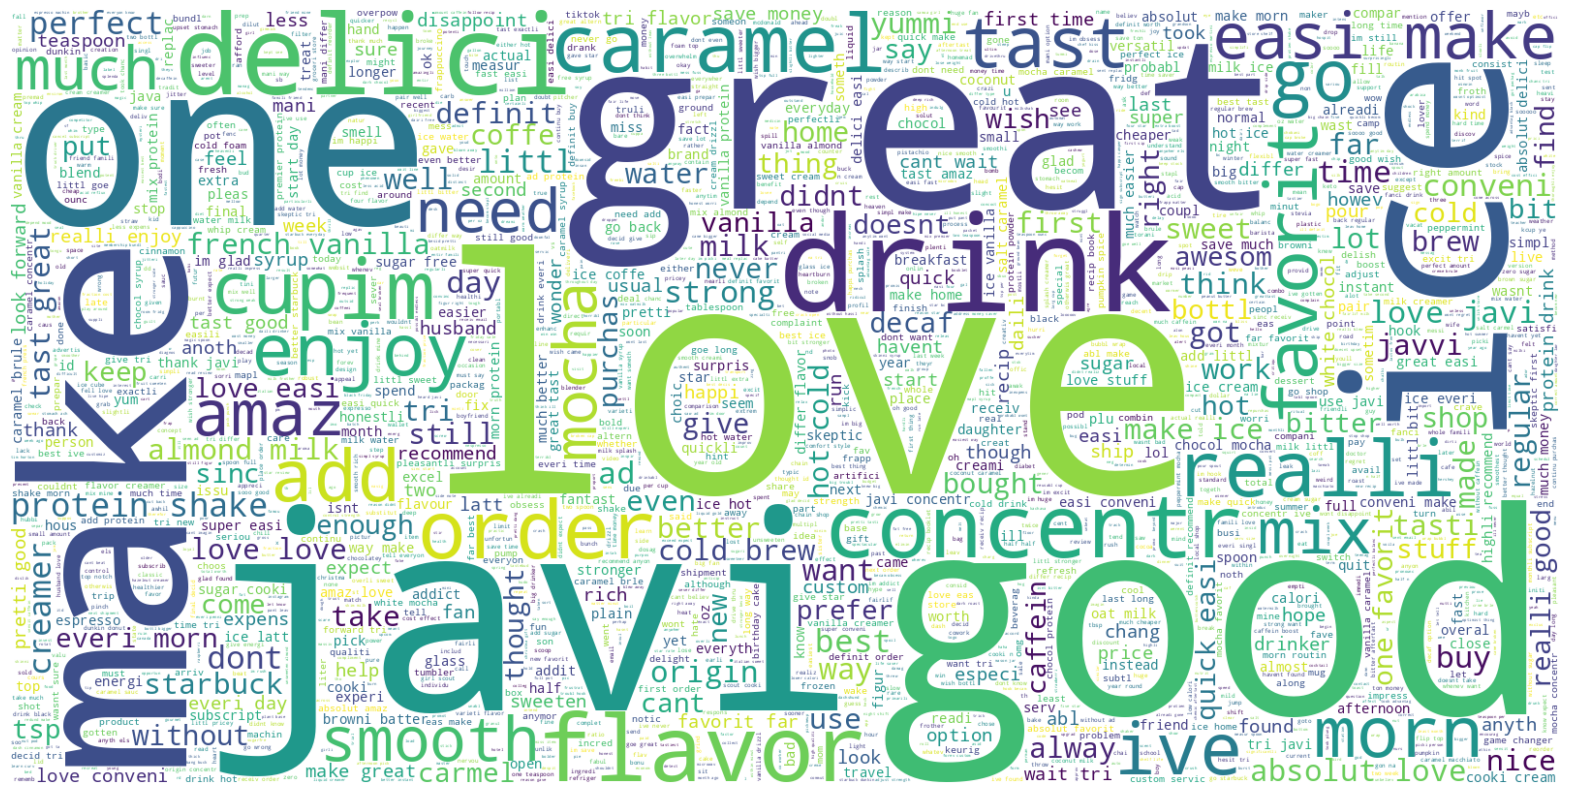

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all positive sentiment texts into one string
positive_text = " ".join(df[df.Sentiment == 'Positive']['processed_review'])

# Create and generate a word cloud image
plt.figure(figsize=(20, 20))
wc = WordCloud(background_color='white', max_words=2000, width=1600, height=800).generate(positive_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


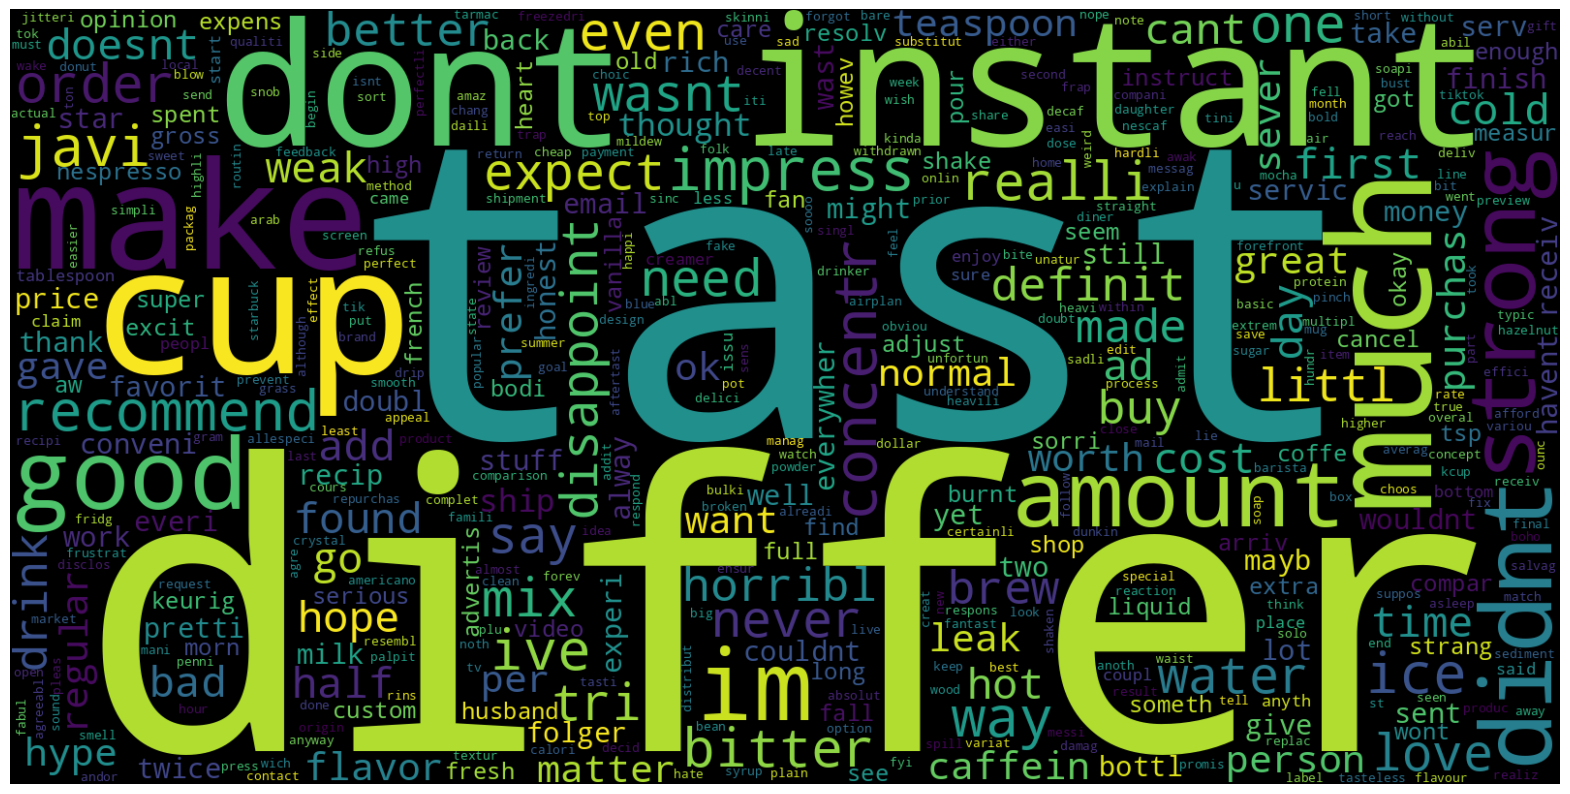

In [ ]:
# Combine all negative sentiment texts into one string
negative_text = " ".join(df[df.Sentiment == 'Negative']['processed_review'])

# Create and generate a word cloud image for negative sentiment reviews
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800).generate(negative_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Traditional Models**

### *Logistic Regression*

Accuracy: 0.9769130998702983
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1883
           1       0.99      0.97      0.98      1972

    accuracy                           0.98      3855
   macro avg       0.98      0.98      0.98      3855
weighted avg       0.98      0.98      0.98      3855



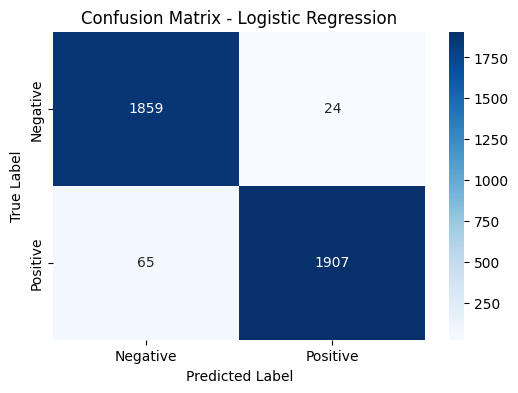

In [ ]:
!pip install seaborn
import seaborn as sns # Import Seaborn library
from sklearn.metrics import confusion_matrix # Import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# 2. Choose and train a model (Logistic Regression in this case)
model = LogisticRegression()
model.fit(X_train, y_train)

# 3. Make predictions
y_pred = model.predict(X_test)

# 4. Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### *Naive Bayes*

Accuracy: 0.9610894941634242
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1883
           1       0.98      0.94      0.96      1972

    accuracy                           0.96      3855
   macro avg       0.96      0.96      0.96      3855
weighted avg       0.96      0.96      0.96      3855



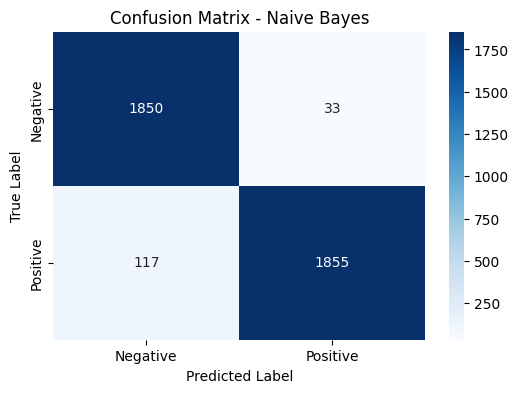

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  # Import Naive Bayes
from sklearn.metrics import accuracy_score, classification_report

# 1. Split data (same as before)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# 2. Choose and train a model (Naive Bayes - MultinomialNB)
model = MultinomialNB()  # Use Multinomial Naive Bayes
model.fit(X_train, y_train)

# 3. Make predictions (same as before)
y_pred = model.predict(X_test)

# 4. Evaluate accuracy (same as before)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### *Support Vector Machines (SVM)*

Accuracy: 0.9976653696498055
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1883
           1       1.00      1.00      1.00      1972

    accuracy                           1.00      3855
   macro avg       1.00      1.00      1.00      3855
weighted avg       1.00      1.00      1.00      3855



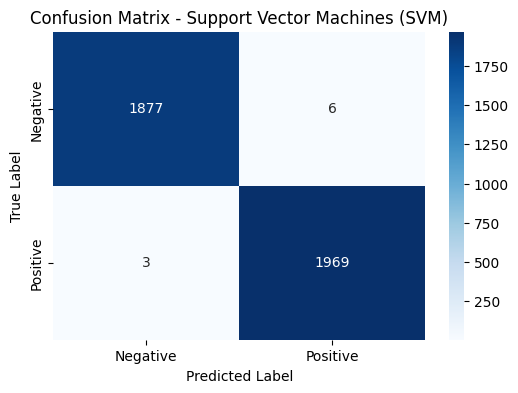

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Import SVM
from sklearn.metrics import accuracy_score, classification_report

# 1. Split data (same as before)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# 2. Choose and train a model (SVM - SVC)
model = SVC()  # Use Support Vector Classifier
model.fit(X_train, y_train)

# 3. Make predictions (same as before)
y_pred = model.predict(X_test)

# 4. Evaluate accuracy (same as before)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Support Vector Machines (SVM)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Comparison of Traditional Models

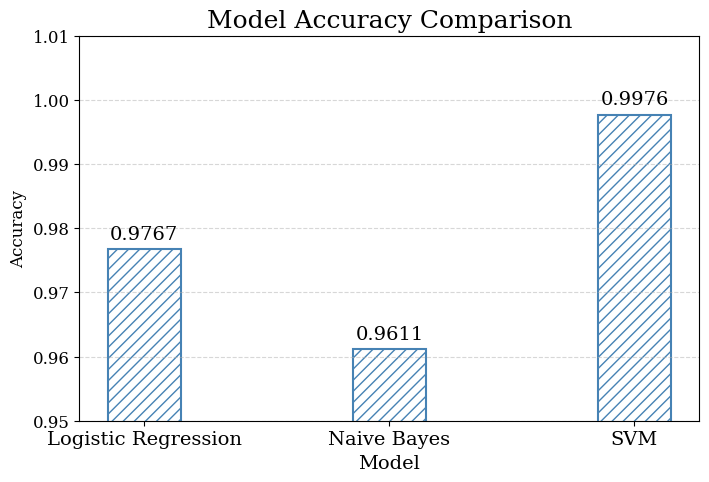

In [ ]:
import matplotlib.pyplot as plt

# Set the default font family to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# Data
models = ['Logistic Regression', 'Naive Bayes', 'SVM']
accuracies = [0.9767, 0.9611, 0.9976]  # Updated accuracy scores

# Plotting the bar chart
plt.figure(figsize=(8,5))  # Adjusted figure size for better visibility
bars = plt.bar(models, accuracies, color='white', edgecolor='steelblue', hatch='//', width=0.3, linewidth=1.5) # Remove fontsize here

# Adjusting hatch thickness
for bar in bars:
    bar.set_hatch('///')

# Labels and Title with increased size and bold font
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=14)
plt.title('Model Accuracy Comparison', fontsize=18)
plt.ylim(0.95, 1.01)  # Adjusted y-axis for better clarity
plt.xticks(fontsize=14)  # Increased fontsize for model names on x-axis
plt.yticks(fontsize=12)

# Adding accuracy values on top of bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.001, f'{accuracy:.4f}', ha='center', va='bottom', fontsize=14)

# Display grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display
plt.show()

# **Pretrained Model - BERT model**



In [ ]:
!pip install transformers
!pip install torch
!pip install datasets
!pip install scikit-learn
!pip install transformers datasets

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from datasets import load_dataset, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Use a model fine-tuned for product reviews or a more general sentiment model
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Prepare the data
def preprocess_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

# Load your data
df = pd.read_excel("pretrained_model.xlsx")

# Convert 'Review Title' column to string type
df['Review Title'] = df['Review Title'].astype(str)

# Create the dataset
dataset = Dataset.from_pandas(df)
dataset = dataset.rename_column("Review Body", "text")
dataset = dataset.rename_column("Sentiment", "label")

# Map labels to numerical values
label_mapping = {'Negative': 0, 'Positive': 1}
def map_labels(examples):
    # Handle potential errors or unexpected labels
    labels = []
    for label in examples['label']:
        try:
            labels.append(label_mapping[label])
        except KeyError:
            print(f"Warning: Unrecognized label '{label}' encountered. Mapping to -1.")
            labels.append(-1)  # Or handle it in another way that suits your needs
    return {'label': labels}

dataset = dataset.map(map_labels, batched=True)

# Apply preprocessing
encoded_dataset = dataset.map(preprocess_function, batched=True)

# Extract the features and labels as NumPy arrays
X = np.array(encoded_dataset['input_ids'])
y = np.array(encoded_dataset['label'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Accuracy test
# Convert data to PyTorch tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test)

# Make predictions
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.logits, 1)

# Calculate accuracy
accuracy = accuracy_score(y_test_tensor.cpu().numpy(), predicted.cpu().numpy())
print(f"Accuracy: {accuracy}")


Map:   0%|          | 0/6544 [00:00<?, ? examples/s]

Map:   0%|          | 0/6544 [00:00<?, ? examples/s]

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Accuracy: 0.6782077393075356


# **Sentiment Analysis: Models Comparison**

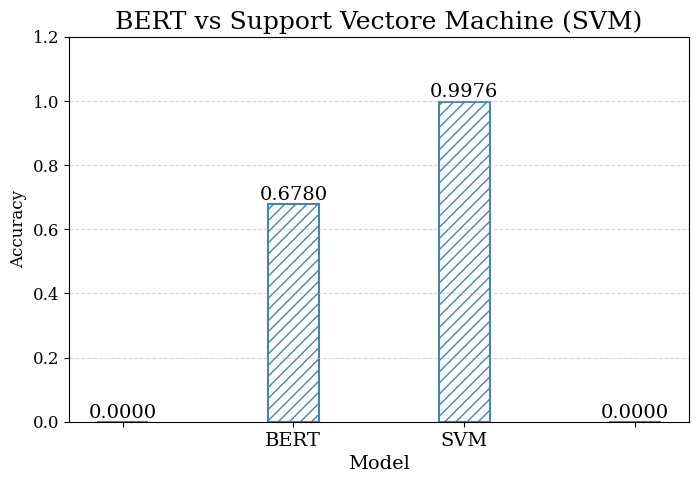

In [ ]:
import matplotlib.pyplot as plt

# Set the default font family to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# Data
models = [' ', 'BERT', 'SVM', '  ']
accuracies = [0 , 0.678, 0.9976, 0]  # Updated accuracy scores

# Plotting the bar chart
plt.figure(figsize=(8,5))  # Adjusted figure size for better visibility
bars = plt.bar(models, accuracies, color='white', edgecolor='steelblue', hatch='//', width=0.3, linewidth=1.5) # Remove fontsize here

# Adjusting hatch thickness
for bar in bars:
    bar.set_hatch('///')

# Labels and Title with increased size and bold font
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=14)
plt.title('BERT vs Support Vectore Machine (SVM)', fontsize=18)
plt.ylim(0, 1.2)  # Adjusted y-axis for better clarity
plt.xticks(fontsize=14)  # Increased fontsize for model names on x-axis
plt.yticks(fontsize=12)

# Adding accuracy values on top of bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.001, f'{accuracy:.4f}', ha='center', va='bottom', fontsize=14)

# Display grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display
plt.show()

## In comparison with a pretrained model, SVM outperforms the BERT model, showing that a company can utilise this model to predict new reviews on the product site accurately